# Importing Needed Libraries

In [1]:
!pip install numpy
!pip install pandas
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install plotly
!pip install sklearn
!pip install tensorflow
!pip install keras

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

import keras
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, LSTM, Dropout

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

#### Reading The Data

In [39]:
data_dir = '/content/sample_data/TSLA.csv'
df = pd.read_csv(data_dir, parse_dates= True , index_col= "Date")

#### Exploratory data analysis

In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2956 entries, 2010-06-29 to 2022-03-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2956 non-null   float64
 1   High       2956 non-null   float64
 2   Low        2956 non-null   float64
 3   Close      2956 non-null   float64
 4   Adj Close  2956 non-null   float64
 5   Volume     2956 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 161.7 KB


In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2956.000000,2956.000000,2956.000000,2956.000000,2956.000000,2.956000e+03
mean,138.691296,141.771603,135.425953,138.762183,138.762183,3.131449e+07
std,250.044839,255.863239,243.774157,250.123115,250.123115,2.798383e+07
min,3.228000,3.326000,2.996000,3.160000,3.160000,5.925000e+05
25%,19.627000,20.402000,19.127500,19.615000,19.615000,1.310288e+07
50%,46.656999,47.487001,45.820002,46.545000,46.545000,2.488680e+07
75%,68.057001,69.357500,66.911501,68.103998,68.103998,3.973875e+07
max,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,3.046940e+08


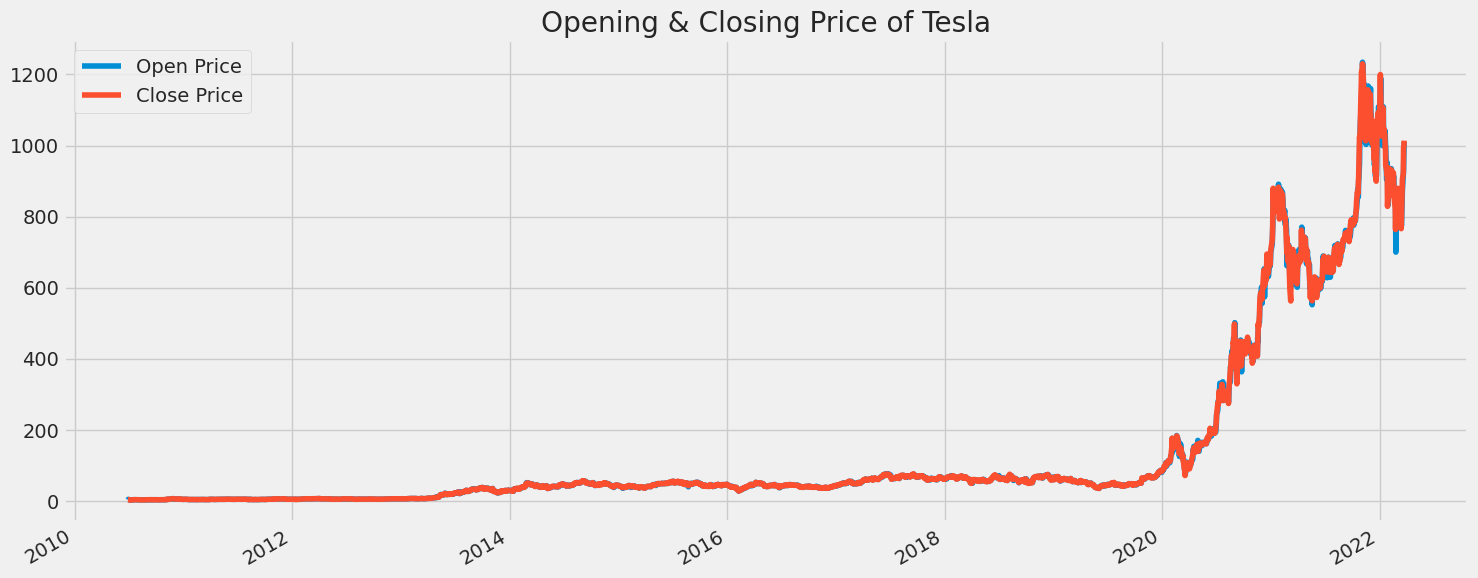

In [7]:
plt.figure(figsize=(15, 6))
df['Open'].plot()
df['Close'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.title("Opening & Closing Price of Tesla")
plt.legend(['Open Price', 'Close Price'])
plt.tight_layout()
plt.show()

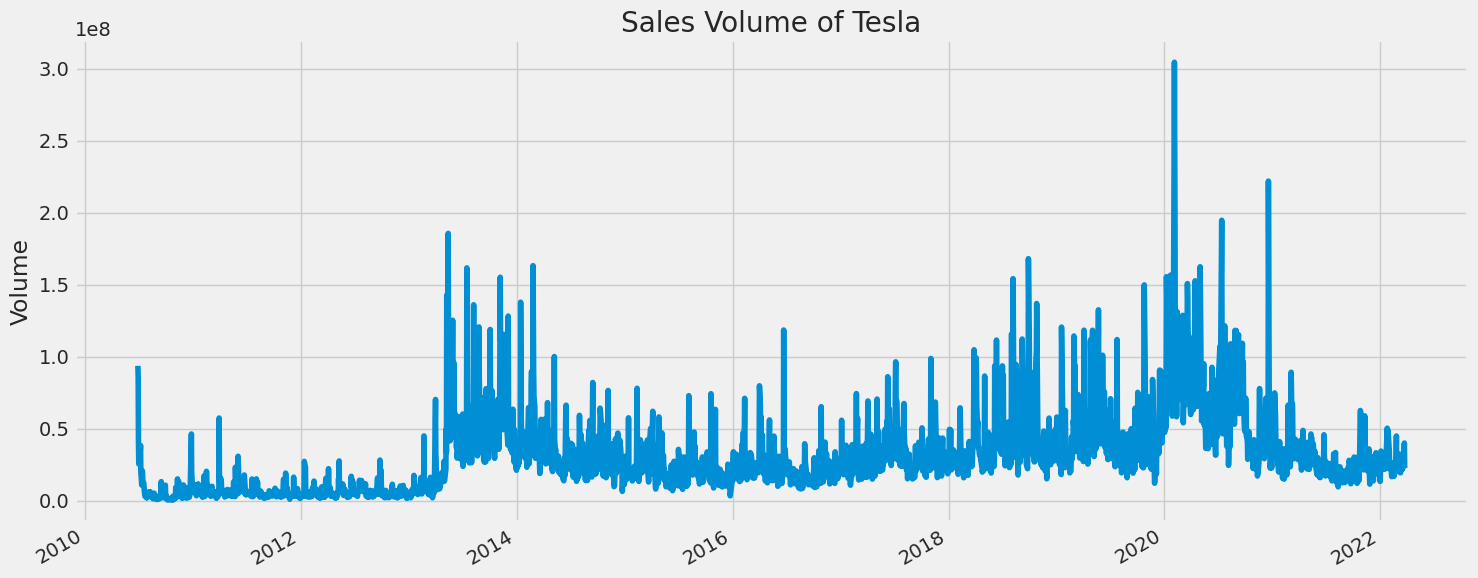

In [8]:
plt.figure(figsize=(15, 6))
df['Volume'].plot()
plt.ylabel('Volume')
plt.xlabel(None)
plt.title("Sales Volume of Tesla")
plt.tight_layout()
plt.show()

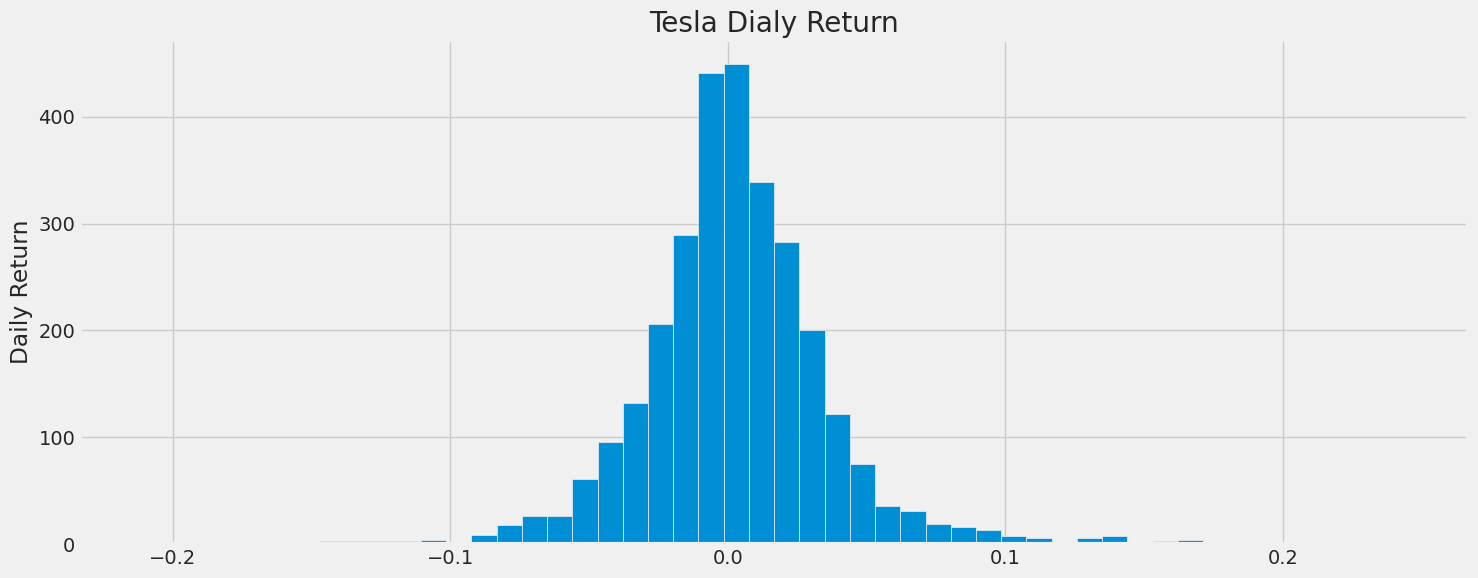

In [9]:
# We'll use pct_change to find the percent change for each day
plt.figure(figsize=(15, 6))
df['Adj Close'].pct_change().hist(bins=50)
plt.ylabel('Daily Return')
plt.title(f'Tesla Dialy Return')
plt.tight_layout()
plt.show()

# Data Preprocessing

### Choosing Prediction Column

In [10]:
dataset = df["Close"]
dataset = pd.DataFrame(dataset)

data = dataset.values

data.shape

(2956, 1)

#### Normalizing Data

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0, 1))
scaled_data = scaler.fit_transform(np.array(data).reshape(-1, 1))

#### Splitting into train and test data

In [12]:
# 75% to Train , 25% to Test
train_size = int(len(data)*.75)
test_size = len(data) - train_size

print("Train Size :",train_size,"Test Size :",test_size)

train_data = scaled_data[ :train_size , 0:1 ]
test_data = scaled_data[ train_size-60: , 0:1 ]

Train Size : 2217 Test Size : 739


In [13]:
train_data.shape, test_data.shape

((2217, 1), (799, 1))

#### Creating training set

In [14]:
# Creating a Training set with 60 time-steps and 1 output
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

In [15]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [16]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [17]:
x_train.shape , y_train.shape

((2157, 60, 1), (2157,))

### Model Building


### LSTM Model

### Model Arch

In [18]:
model = Sequential([
    LSTM(50, return_sequences= True, input_shape= (x_train.shape[1], 1)),
    LSTM(64, return_sequences= False),
    Dense(32),
    Dense(16),
    Dense(1)
])

model.compile(optimizer= 'adam', loss= 'mse' , metrics= "mean_absolute_error")

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 64)                29440     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 42465 (165.88 KB)
Trainable params: 42465 (165.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Model Training

In [20]:
# Fitting the LSTM to the Training set
callbacks = [EarlyStopping(monitor= 'loss', patience= 10 , restore_best_weights= True)]
history = model.fit(x_train, y_train, epochs= 100, batch_size= 32 , callbacks= callbacks )

Epoch 1/100
68/68 [==============================] - 7s 13ms/step - loss: 5.4965e-05 - mean_absolute_error: 0.0046
Epoch 2/100
68/68 [==============================] - 1s 13ms/step - loss: 5.6975e-06 - mean_absolute_error: 0.0017
Epoch 3/100
68/68 [==============================] - 1s 12ms/step - loss: 5.3041e-06 - mean_absolute_error: 0.0017
Epoch 4/100
68/68 [==============================] - 1s 9ms/step - loss: 5.3864e-06 - mean_absolute_error: 0.0017
Epoch 5/100
68/68 [==============================] - 1s 9ms/step - loss: 5.1804e-06 - mean_absolute_error: 0.0017
Epoch 6/100
68/68 [==============================] - 1s 9ms/step - loss: 6.0658e-06 - mean_absolute_error: 0.0018
Epoch 7/100
68/68 [==============================] - 1s 9ms/step - loss: 5.1063e-06 - mean_absolute_error: 0.0017
Epoch 8/100
68/68 [==============================] - 1s 10ms/step - loss: 6.5398e-06 - mean_absolute_error: 0.0020
Epoch 9/100
68/68 [==============================] - 1s 9ms/step - loss: 4.1214e-06 

### Model Evaluation

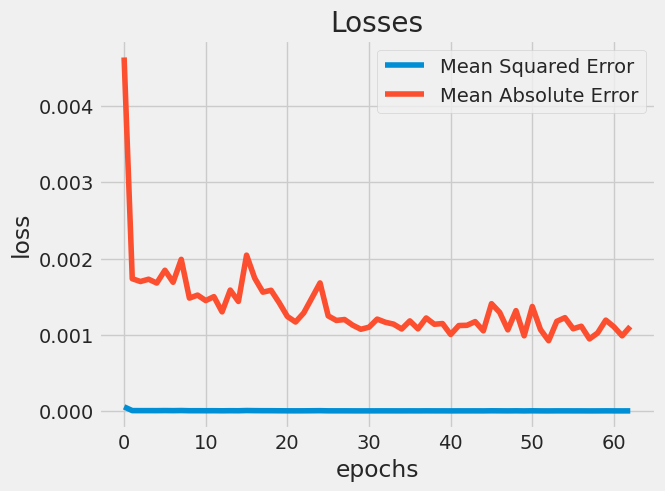

In [21]:
plt.plot(history.history["loss"])
plt.plot(history.history["mean_absolute_error"])
plt.legend(['Mean Squared Error','Mean Absolute Error'])
plt.title("Losses")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

#### Accuracy Comparison


#### Creating testing set

In [22]:
# Creating a testing set with 60 time steps and 1 output
x_test = []
y_test = []

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    y_test.append(test_data[i, 0])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [23]:
x_test.shape , y_test.shape

((739, 60, 1), (739,))

In [24]:
#inverse y_test scaling
predictions = model.predict(x_test)

#inverse predictions scaling
predictions = scaler.inverse_transform(predictions)
predictions.shape

24/24 [==============================] - 1s 5ms/step


(739, 1)

### Root mean square error

In [25]:
#inverse y_test scaling
y_test = scaler.inverse_transform([y_test])

RMSE = np.sqrt(np.mean( y_test - predictions )**2).round(2)
RMSE

24.69

#### Visualize Predictions with The Data

#### Plotting the data through matplotlib

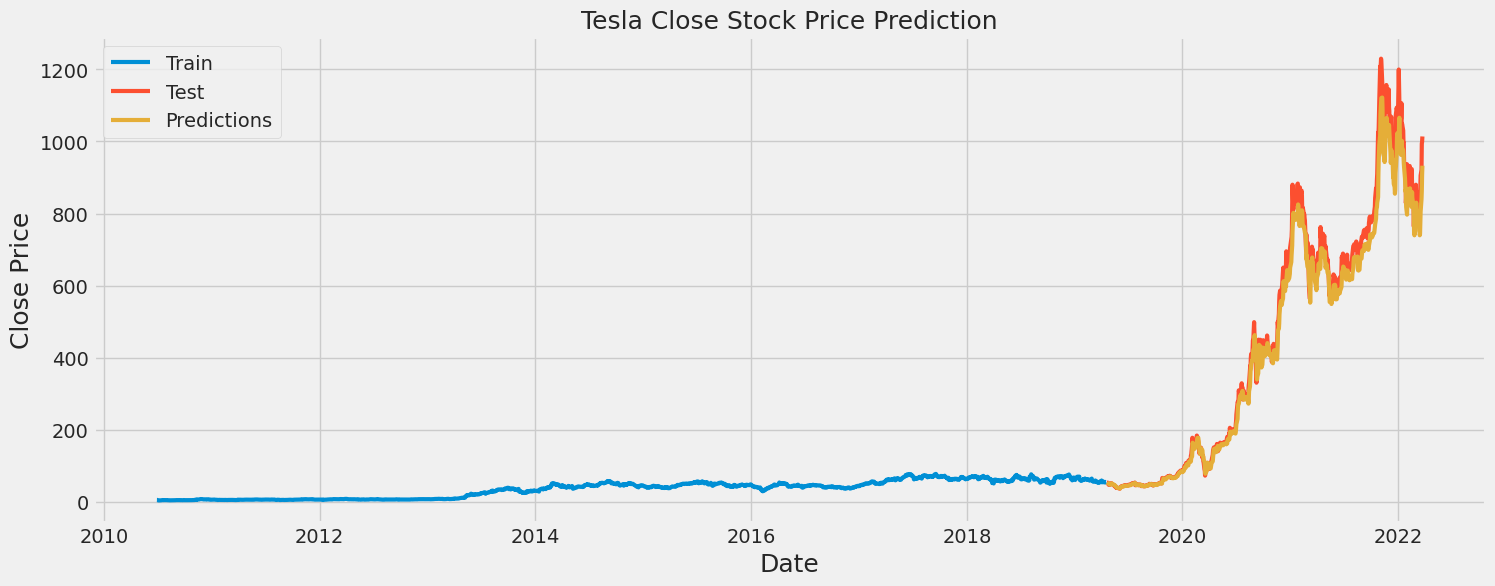

In [26]:
train = dataset.iloc[:train_size , 0:1]
test = dataset.iloc[train_size: , 0:1]
test['Predictions'] = predictions

plt.figure(figsize= (16, 6))
plt.title('Tesla Close Stock Price Prediction', fontsize= 18)
plt.xlabel('Date', fontsize= 18)
plt.ylabel('Close Price', fontsize= 18)
plt.plot(train['Close'], linewidth= 3)
plt.plot(test['Close'], linewidth= 3)
plt.plot(test["Predictions"], linewidth= 3)
plt.legend(['Train', 'Test', 'Predictions'])

#### Interactive plot using plotly

In [38]:
import plotly.graph_objects as go

# Assuming 'dataset', 'train_size', and 'predictions' are already defined
train = dataset.iloc[:train_size, 0:1]
test = dataset.iloc[train_size:, 0:1]
test['Predictions'] = predictions

# Create a figure
fig = go.Figure()

# Add train data trace
fig.add_trace(go.Scatter(x=train.index, y=train['Close'], mode='lines', name='Train', line=dict(width=3)))

# Add test data trace
fig.add_trace(go.Scatter(x=test.index, y=test['Close'], mode='lines', name='Test', line=dict(width=3)))

# Add predictions data trace
fig.add_trace(go.Scatter(x=test.index, y=test['Predictions'], mode='lines', name='Predictions', line=dict(width=3)))

# Update layout
fig.update_layout(
    title='Tesla Close Stock Price Prediction',
    xaxis_title='Date',
    yaxis_title='Close Price',
    legend_title='Legend',
    template='plotly_white',
    font=dict(size=18)
)

# Show the figure
fig.show()


#### Forecast Next 30 Days

#### This forecast is generated by our model.

In [27]:
from datetime import timedelta

In [28]:
def insert_end(Xin, new_input):
    timestep = 60
    for i in range(timestep - 1):
        Xin[:, i, :] = Xin[:, i+1, :]
    Xin[:, timestep - 1, :] = new_input
    return Xin

In [29]:
future = 30
forcast = []
Xin = x_test[-1 :, :, :]
time = []
for i in range(0, future):
    out = model.predict(Xin, batch_size=5)
    forcast.append(out[0, 0])
    print(forcast)
    Xin = insert_end(Xin, out[0, 0])
    time.append(pd.to_datetime(df.index[-1]) + timedelta(days=i))

1/1 [==============================] - 0s 41ms/step
[0.75775105]
1/1 [==============================] - 0s 19ms/step
[0.75775105, 0.7355134]
1/1 [==============================] - 0s 19ms/step
[0.75775105, 0.7355134, 0.7044248]
1/1 [==============================] - 0s 18ms/step
[0.75775105, 0.7355134, 0.7044248, 0.67101586]
1/1 [==============================] - 0s 19ms/step
[0.75775105, 0.7355134, 0.7044248, 0.67101586, 0.63772523]
1/1 [==============================] - 0s 19ms/step
[0.75775105, 0.7355134, 0.7044248, 0.67101586, 0.63772523, 0.60599935]
1/1 [==============================] - 0s 20ms/step
[0.75775105, 0.7355134, 0.7044248, 0.67101586, 0.63772523, 0.60599935, 0.57675284]
1/1 [==============================] - 0s 26ms/step
[0.75775105, 0.7355134, 0.7044248, 0.67101586, 0.63772523, 0.60599935, 0.57675284, 0.55048627]
1/1 [==============================] - 0s 21ms/step
[0.75775105, 0.7355134, 0.7044248, 0.67101586, 0.63772523, 0.60599935, 0.57675284, 0.55048627, 0.52736807

In [30]:
time

[Timestamp('2022-03-24 00:00:00'),
 Timestamp('2022-03-25 00:00:00'),
 Timestamp('2022-03-26 00:00:00'),
 Timestamp('2022-03-27 00:00:00'),
 Timestamp('2022-03-28 00:00:00'),
 Timestamp('2022-03-29 00:00:00'),
 Timestamp('2022-03-30 00:00:00'),
 Timestamp('2022-03-31 00:00:00'),
 Timestamp('2022-04-01 00:00:00'),
 Timestamp('2022-04-02 00:00:00'),
 Timestamp('2022-04-03 00:00:00'),
 Timestamp('2022-04-04 00:00:00'),
 Timestamp('2022-04-05 00:00:00'),
 Timestamp('2022-04-06 00:00:00'),
 Timestamp('2022-04-07 00:00:00'),
 Timestamp('2022-04-08 00:00:00'),
 Timestamp('2022-04-09 00:00:00'),
 Timestamp('2022-04-10 00:00:00'),
 Timestamp('2022-04-11 00:00:00'),
 Timestamp('2022-04-12 00:00:00'),
 Timestamp('2022-04-13 00:00:00'),
 Timestamp('2022-04-14 00:00:00'),
 Timestamp('2022-04-15 00:00:00'),
 Timestamp('2022-04-16 00:00:00'),
 Timestamp('2022-04-17 00:00:00'),
 Timestamp('2022-04-18 00:00:00'),
 Timestamp('2022-04-19 00:00:00'),
 Timestamp('2022-04-20 00:00:00'),
 Timestamp('2022-04-

### Create forecasted dataframe

In [31]:
forcasted_output = np.asanyarray(forcast)
forcasted_output = forcasted_output.reshape(-1, 1)
forcasted_output = scaler.inverse_transform(forcasted_output)

In [32]:
forcasted_output = pd.DataFrame(forcasted_output)
date = pd.DataFrame(time)
df_result = pd.concat([date,forcasted_output], axis=1)
df_result.columns = "Date", "Forecasted"

## Forecasted tesla close price

In [33]:
df_result

,Date,Forecasted
0,2022-03-24,932.731140
1,2022-03-25,905.451111
2,2022-03-26,867.313171
3,2022-03-27,826.328735
4,2022-03-28,785.489502
5,2022-03-29,746.569763
6,2022-03-30,710.691589
7,2022-03-31,678.469055
8,2022-04-01,650.108826
9,2022-04-02,625.509399


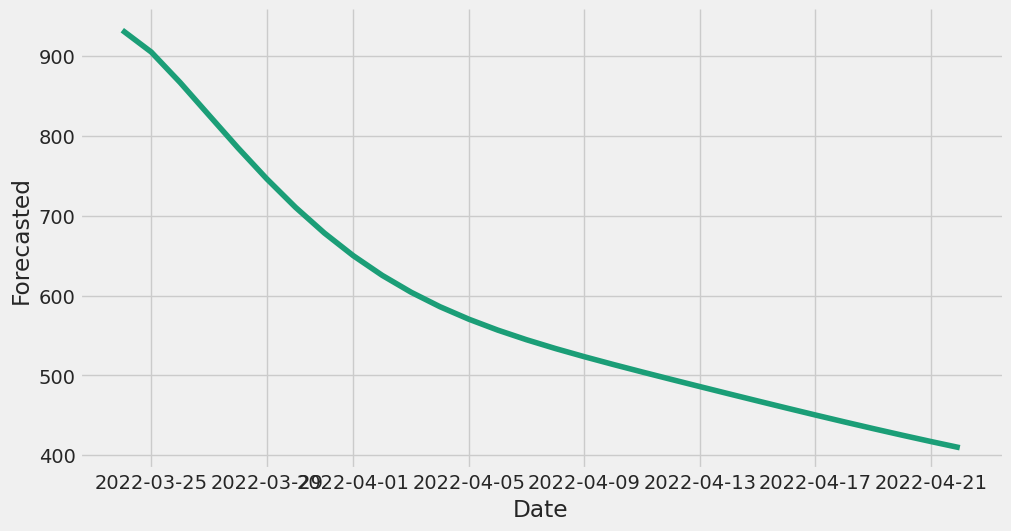

In [35]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Forecasted']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_result.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Forecasted')

#### Interactive plot using Plotly

In [37]:
import plotly.graph_objects as go

# Assuming df and df_result are your dataframes and are already defined

# Create a figure
fig = go.Figure()

# Add the actual closing price trace
fig.add_trace(go.Scatter(x=df.index, y=df['Close'], mode='lines', name='Actual Close'))

# Add the forecasted closing price trace
fig.add_trace(go.Scatter(x=df_result['Date'], y=df_result['Forecasted'], mode='lines', name='Forecasted Close'))

# Update layout
fig.update_layout(
    title='Tesla Close Stock Price Forecasting For Next 30 Days',
    xaxis_title='Date',
    yaxis_title='Close',
    xaxis=dict(
        tickformat='%Y-%m-%d',
        tickmode='auto'
    ),
    template='plotly_white'
)

# Show the figure
fig.show()
